### Student Information
Name:杜義榤

Student ID:113232506

GitHub ID:EJDU21

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [16]:
### Begin Assignment Here
import pandas as pd
df = pd.read_csv("./Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df.keys()

Index(['sentiment', 'comment'], dtype='object')

In [17]:
len(df.comment)

1500

In [18]:
print("\n".join(df.comment[0].split("\n")))

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


In [19]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [20]:
df['sentiment'].value_counts()

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

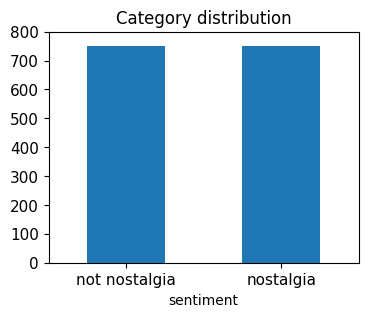

In [21]:
#Dynamically adjust ylim and draw Category distribution quantity chart
max_y = df['sentiment'].value_counts().max()
df['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max_y + 50],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

In [22]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
df["unigrams"]

0       [He, was, a, singer, with, a, golden, voice, t...
1       [The, mist, beautiful, voice, ever, I, listene...
2       [I, have, most, of, Mr., Reeves, songs, ., Alw...
3       [30, day, leave, from, 1st, tour, in, Viet, Na...
4       [listening, to, his, songs, reminds, me, of, m...
                              ...                        
1495    [i, do, n't, know, !, .., but, the, opening, o...
1496    [it, 's, sad, this, is, such, a, beautiful, so...
1497    [Dear, Friend, ,, I, think, age, and, time, is...
1498    [I, was, born, in, 1954, and, started, to, be,...
1499    [This, is, the, first, CD, I, bought, after, m...
Name: unigrams, Length: 1500, dtype: object

In [23]:
df[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df.comment)
#X_tfidf.shape
average_tfidf = X_tfidf.mean(axis=0).A1
terms = tfidf_vect.get_feature_names_out()
#len(terms)
#terms.shape
#terms[10:20]

3730
74


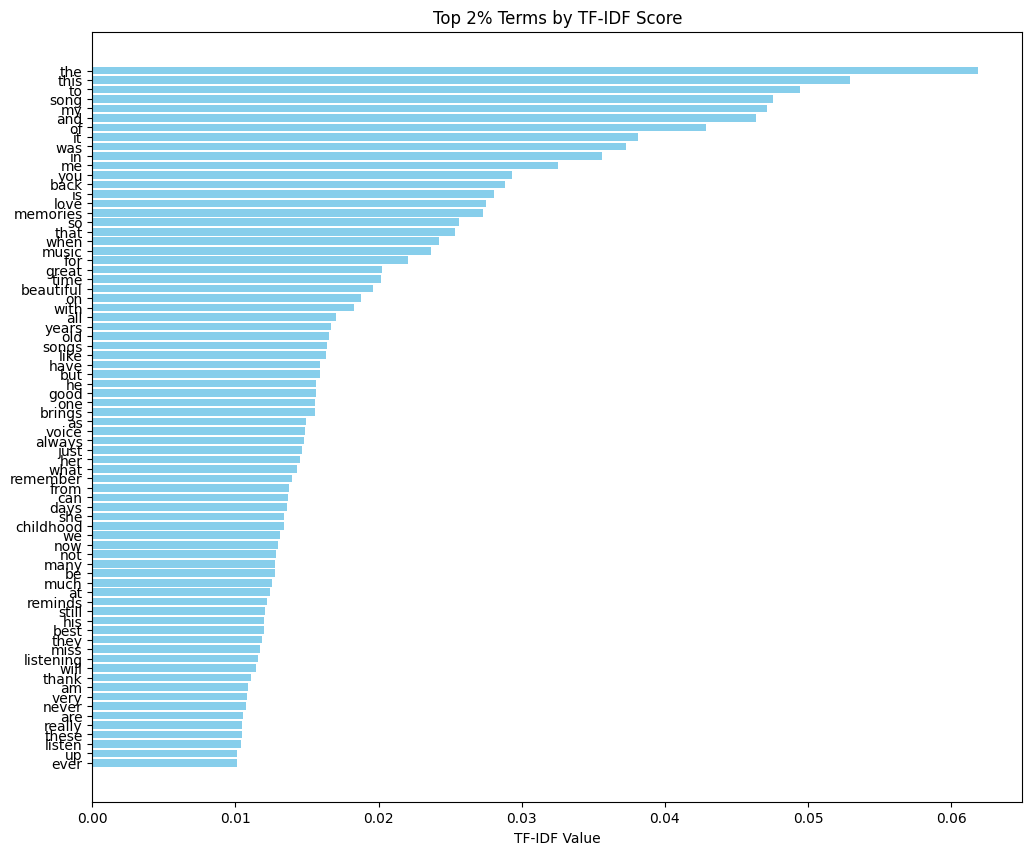

In [25]:
top_2_percent_count = int(len(average_tfidf) * 0.02)  # top 2%
print(len(average_tfidf))
print(top_2_percent_count)

# Sort and take the top 2% of words
top_indices = np.argsort(average_tfidf)[-top_2_percent_count:]
top_2_percent_terms  = [terms[i] for i in top_indices]
top_2_percent_tfidf = average_tfidf[top_indices]

# Draw
plt.figure(figsize=(12, 10))
plt.barh(top_2_percent_terms, top_2_percent_tfidf, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.title('Top 2% Terms by TF-IDF Score')
plt.show()


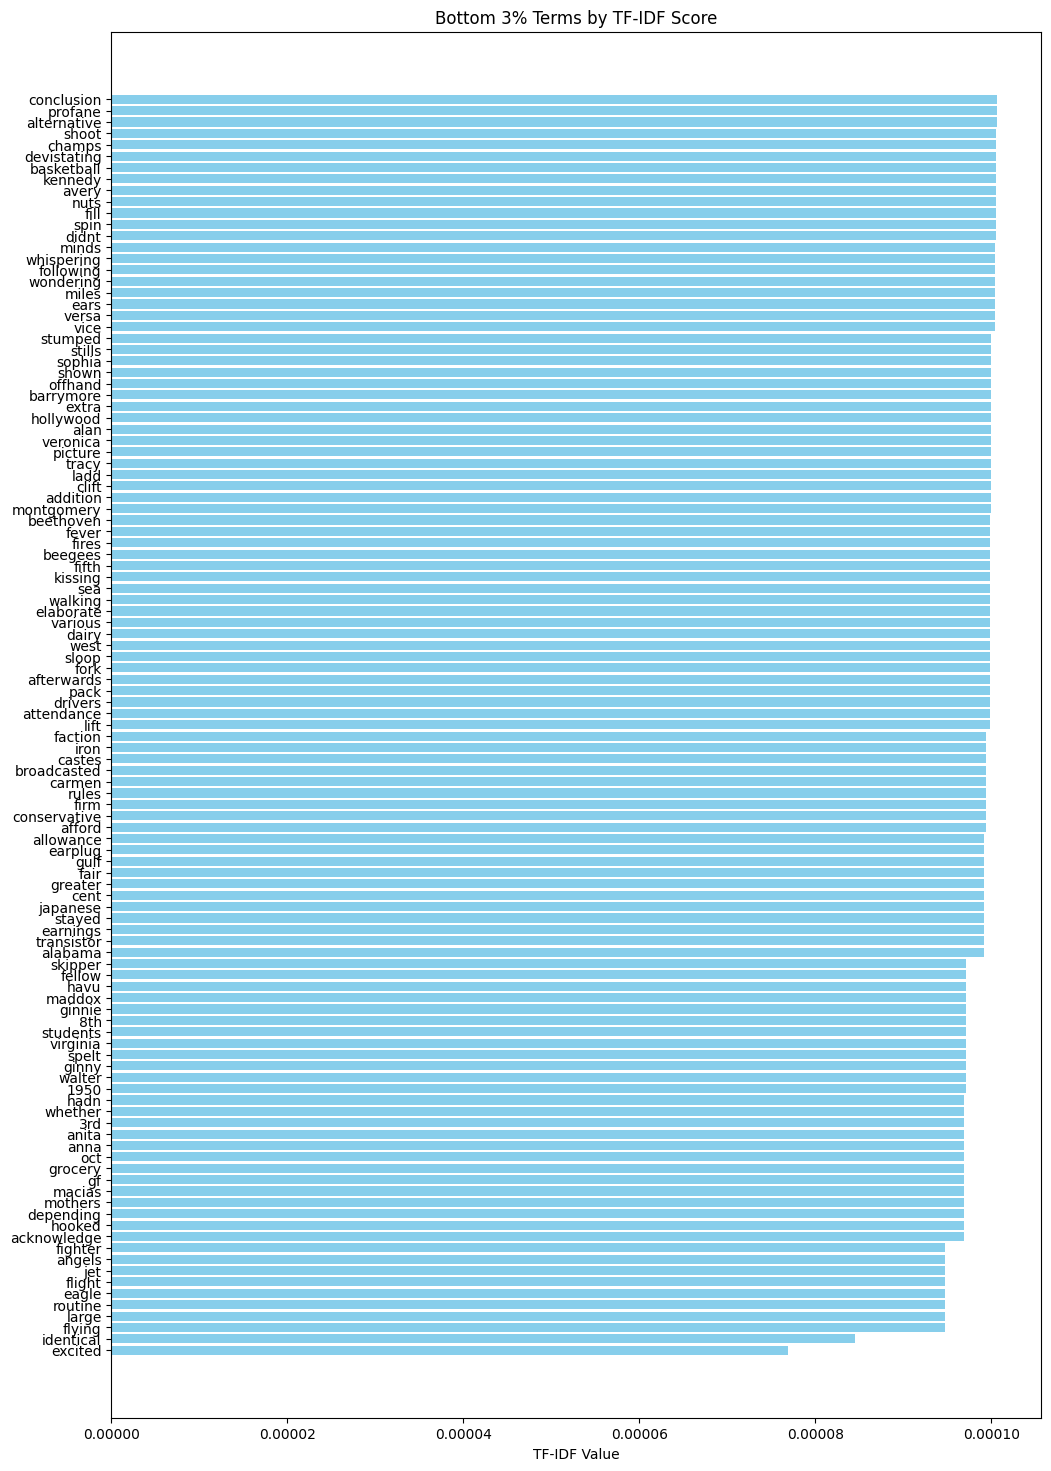

In [26]:
bottom_3_percent_count = int(len(average_tfidf) * 0.03) # bottom 3%
# Sort and take the words with the last 3% 
bottom_indices = np.argsort(average_tfidf)[:bottom_3_percent_count]
bottom_3_terms = [terms[i] for i in bottom_indices]
bottom_3_tfidf = average_tfidf[bottom_indices]
# Draw
plt.figure(figsize=(12, 18))
plt.barh(bottom_3_terms, bottom_3_tfidf, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.title('Bottom 3% Terms by TF-IDF Score')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Divide the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.3, random_state=42)

# Initialize the MultinomialNB model and train
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)

# predict
y_pred_tfidf = nb_tfidf.predict(X_test)

# eval
print("MultinomialNB Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nMultinomialNB Classification Report:\n", classification_report(y_test, y_pred_tfidf))


MultinomialNB Model Accuracy: 0.8488888888888889

MultinomialNB Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.80      0.93      0.86       225
not nostalgia       0.92      0.76      0.83       225

     accuracy                           0.85       450
    macro avg       0.86      0.85      0.85       450
 weighted avg       0.86      0.85      0.85       450



In [28]:
# Merge the indexes of words to be excluded and generate a set
exclude_indices = set(np.concatenate([top_indices, bottom_indices]))

# Find the words index to keep
keep_indices = [i for i in range(len(terms)) if i not in exclude_indices]

# Generate filtered TF-IDF 
X_tfidf_filtered = X_tfidf[:, keep_indices]

# Verify filtered matrix dimensions
print(f"Original matrix shape: {X_tfidf.shape}")
print(f"FilteringMatrix shape: {X_tfidf_filtered.shape}")
# Divide the data into training set and test set (70/30)
filtered_X_train, filtered_X_test, filtered_y_train, filtered_y_test = train_test_split(X_tfidf_filtered, df['sentiment'], test_size=0.3, random_state=42)

# # Initialize the MultinomialNB model 2 and train
nb_tfidf2 = MultinomialNB()
nb_tfidf2.fit(filtered_X_train, filtered_y_train)

# predict
filtered_y_pred_tfidf = nb_tfidf2.predict(filtered_X_test)

# eval
print("Filtered TF-IDF Model Accuracy:", accuracy_score(filtered_y_test, filtered_y_pred_tfidf))
print("\nFiltered TF-IDF Model Classification Report:\n", classification_report(filtered_y_test, filtered_y_pred_tfidf))

Original matrix shape: (1500, 3730)
FilteringMatrix shape: (1500, 3545)
Filtered TF-IDF Model Accuracy: 0.8022222222222222

Filtered TF-IDF Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.77      0.86      0.81       225
not nostalgia       0.84      0.75      0.79       225

     accuracy                           0.80       450
    macro avg       0.81      0.80      0.80       450
 weighted avg       0.81      0.80      0.80       450



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Divide the data into training set and test set
Bnb_X_train, Bnb_X_test, Bnb_y_train, Bnb_y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.3, random_state=42)

# # Initialize the BernoulliNB model and train
Bnb_tfidf = BernoulliNB()
Bnb_tfidf.fit(Bnb_X_train, Bnb_y_train)

# predict
Bnb_y_pred_tfidf = Bnb_tfidf.predict(Bnb_X_test)

# eval
print("BernoulliNB Model Accuracy:", accuracy_score(Bnb_y_test, Bnb_y_pred_tfidf))
print("\nBernoulliNB Model Classification Report:\n", classification_report(Bnb_y_test, Bnb_y_pred_tfidf))

BernoulliNB Model Accuracy: 0.8733333333333333

BernoulliNB Model Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.84      0.92      0.88       225
not nostalgia       0.91      0.83      0.87       225

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



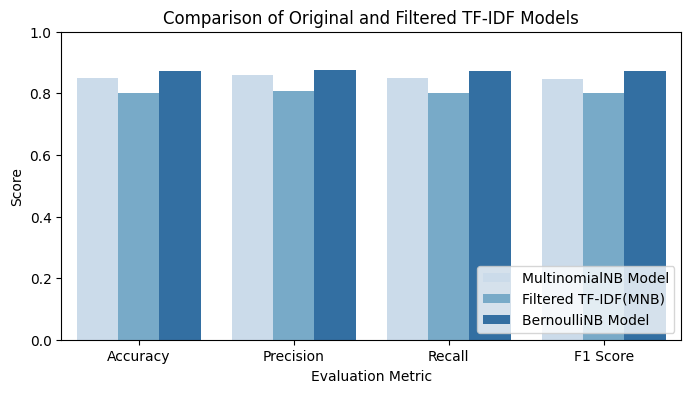

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
# Organize model evaluation results
results = {
    'Model': ['MultinomialNB Model', 'MultinomialNB Model', 'MultinomialNB Model', 'MultinomialNB Model',
              'Filtered TF-IDF(MNB)', 'Filtered TF-IDF(MNB)', 'Filtered TF-IDF(MNB)', 'Filtered TF-IDF(MNB)',
              'BernoulliNB Model', 'BernoulliNB Model', 'BernoulliNB Model', 'BernoulliNB Model'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [
        accuracy_score(y_test, y_pred_tfidf), 
        metrics.precision_score(y_test, y_pred_tfidf, average='weighted'),
        metrics.recall_score(y_test, y_pred_tfidf, average='weighted'),
        metrics.f1_score(y_test, y_pred_tfidf, average='weighted'),
        
        accuracy_score(filtered_y_test, filtered_y_pred_tfidf),
        metrics.precision_score(filtered_y_test, filtered_y_pred_tfidf, average='weighted'),
        metrics.recall_score(filtered_y_test, filtered_y_pred_tfidf, average='weighted'),
        metrics.f1_score(filtered_y_test, filtered_y_pred_tfidf, average='weighted'),
        
        accuracy_score(Bnb_y_test, Bnb_y_pred_tfidf), 
        metrics.precision_score(Bnb_y_test, Bnb_y_pred_tfidf, average='weighted'),
        metrics.recall_score(Bnb_y_test, Bnb_y_pred_tfidf, average='weighted'),
        metrics.f1_score(Bnb_y_test, Bnb_y_pred_tfidf, average='weighted'),
    ]
}

# Convert the result to DataFrame
df_results = pd.DataFrame(results)

# Using seaborn to draw 
plt.figure(figsize=(8, 4))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_results, palette='Blues')

plt.title('Comparison of Original and Filtered TF-IDF Models')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In the DM2024-Lab1-Master, filtering out the most and least used words was applied. However, this step does not work well with TF-IDF and results in decreased accuracy. The reason is that high-frequency words have lower weights in TF-IDF, making the filtering redundant or even unnecessary. Additionally, the importance of low-frequency words may be underestimated. Since TF-IDF already has a built-in filtering mechanism, we should avoid additional filtering. If we need to remove meaningless words, we can use Scikit-learn's stop word list by setting stop_words='the'